#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import tqdm

In [5]:
path ="/content/drive/My Drive/Colab Notebooks/data/preprocessed_data.csv"
data = pd.read_csv(path)

## Creating Sentiment Features

In [6]:
sid = SentimentIntensityAnalyzer()
sentiments = []
for essay in data['essay']:
  polarity = sid.polarity_scores(essay)
  sentiments.append(polarity)
sentiments

[{'compound': 0.9867, 'neg': 0.013, 'neu': 0.783, 'pos': 0.205},
 {'compound': 0.9897, 'neg': 0.072, 'neu': 0.68, 'pos': 0.248},
 {'compound': 0.986, 'neg': 0.017, 'neu': 0.721, 'pos': 0.262},
 {'compound': 0.9524, 'neg': 0.03, 'neu': 0.783, 'pos': 0.187},
 {'compound': 0.9873, 'neg': 0.029, 'neu': 0.683, 'pos': 0.288},
 {'compound': 0.9935, 'neg': 0.013, 'neu': 0.701, 'pos': 0.286},
 {'compound': 0.9977, 'neg': 0.019, 'neu': 0.577, 'pos': 0.404},
 {'compound': 0.9964, 'neg': 0.067, 'neu': 0.631, 'pos': 0.302},
 {'compound': 0.9484, 'neg': 0.063, 'neu': 0.784, 'pos': 0.153},
 {'compound': 0.9861, 'neg': 0.057, 'neu': 0.708, 'pos': 0.235},
 {'compound': 0.9976, 'neg': 0.012, 'neu': 0.578, 'pos': 0.41},
 {'compound': 0.9952, 'neg': 0.034, 'neu': 0.731, 'pos': 0.235},
 {'compound': 0.9875, 'neg': 0.013, 'neu': 0.669, 'pos': 0.318},
 {'compound': 0.9955, 'neg': 0.041, 'neu': 0.606, 'pos': 0.353},
 {'compound': 0.9834, 'neg': 0.018, 'neu': 0.832, 'pos': 0.15},
 {'compound': 0.9959, 'neg': 0

In [60]:
sentiment_df = pd.DataFrame(sentiments)
data['neg'] = sentiment_df['neg'].values
data['neu'] = sentiment_df['neu'].values
data['pos'] = sentiment_df['pos'].values
data['compound'] = sentiment_df['compound'].values

In [61]:
data.head()
#saving
data.to_csv("/content/drive/My Drive/Colab Notebooks/data/preprocessed_with_sentiment.csv",index=False)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/preprocessed_with_sentiment.csv")
y =data['project_is_approved']
X_train, X_test ,Y_train,Y_test = train_test_split(data,y,test_size = 0.25,stratify =y,random_state=42)

In [8]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
66441,ok,mr,grades_6_8,0,1,appliedlearning,charactereducation,my wonderful middle students active extremely ...,314.56,0.011,0.612,0.377,0.9915
45954,ut,mrs,grades_prek_2,19,1,specialneeds,specialneeds,i teach special class children autism one stud...,33.28,0.015,0.740,0.245,0.9818
73547,nc,mrs,grades_3_5,0,1,math_science appliedlearning,appliedsciences charactereducation,our school serves students variety backgrounds...,433.26,0.031,0.626,0.344,0.9923
25693,ca,ms,grades_prek_2,5,1,math_science literacy_language,health_lifescience literacy,our school fabulous international baccalaureat...,162.95,0.000,0.726,0.274,0.9882
62089,ca,mr,grades_3_5,37,1,literacy_language,literacy,my students amazing diverse group fruitvale ne...,233.51,0.010,0.782,0.208,0.9916


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [64]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### TFIDF

In [9]:
essay_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
essay_tfidf_train = essay_vectorizer.fit_transform(X_train['essay'].values)
essay_tfidf_test = essay_vectorizer.fit_transform(X_test['essay'].values)

print("After TFIDF vectorizations")
print(essay_tfidf_train.shape, Y_train.shape)
print(essay_tfidf_test.shape, Y_test.shape)
print("="*100)
print("="*100)

After TFIDF vectorizations
(81936, 5000) (81936,)
(27312, 5000) (27312,)


### TFIDF-W2VEC

In [10]:
preprocessed_essays = X_train['essay']
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [11]:

with open('/content/drive/My Drive/Colab Notebooks/data/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [12]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2vec(feature,glove_words,dictionary,tfidf_words):
  tfidf_w2v_vectors = [] # the avg-w2v for each sentence/review is stored in this list
  for sentence in feature: # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors

In [13]:
tfidf_w2vec_train = tfidf_w2vec(X_train['essay'],glove_words,dictionary,tfidf_words)
tfidf_w2vec_test = tfidf_w2vec(X_test['essay'],glove_words,dictionary,tfidf_words)
print(len(tfidf_w2vec_train))
print(len(tfidf_w2vec_train[0]))

81936
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [14]:
#feature responsecoding with lapalace smoothing
def feature_dictionary(alpha,feature,df):
  value_counts = df[feature].value_counts()
  #feature_dict will contain probability value of each feature
  feature_dict = dict()
  for i,denom in value_counts.items():
    vec =[]
    #feature with target = 1
    cls_cnt = df.loc[(df['project_is_approved']==1) & (df[feature]==i)]
    #here we are doing lapalace smoothing
    vec.append((cls_cnt.shape[0] + alpha*10)/ (denom + 20*alpha))
    #feature with target = 0
    cls_cnt = df.loc[(df['project_is_approved']==0) & (df[feature]==i)]
    vec.append((cls_cnt.shape[0] + alpha*10)/ (denom + 20*alpha))
    feature_dict[i] = vec
  return feature_dict

def response_coding(alpha,feature,df):
  feature_dict = feature_dictionary(alpha,feature,X_train)
  value_counts = df[feature].value_counts()
  response_features = []
  # we will check if feature value exist in train feature_dict and if
  #it is not we will add [0.5,0.5] to the feature
  for index, row in df.iterrows():
    if row[feature] in dict(feature_dict).keys():
        response_features.append(feature_dict[row[feature]])
    else:
        response_features.append([1/2,1/2])
  return response_features



## Encoding Categorical features: School State ,teacher_prefix, project grade category,clean categories,clean subcategories

In [15]:
#for training data
alpha = 1
school_state_fe_train = np.array(response_coding(alpha,"school_state",X_train))
teacher_prefix_fe_train = np.array(response_coding(alpha,"teacher_prefix",X_train))
project_grade_category_fe_train = np.array(response_coding(alpha,"project_grade_category",X_train))
clean_categories_fe_train = np.array(response_coding(alpha,"clean_categories",X_train))
clean_subcategories_fe_train = np.array(response_coding(alpha,"clean_subcategories",X_train))

In [17]:
print(school_state_fe_train.shape)
print(teacher_prefix_fe_train.shape)
print(project_grade_category_fe_train.shape)
print(clean_categories_fe_train.shape)
print(clean_subcategories_fe_train.shape)

(81936, 2)
(81936, 2)
(81936, 2)
(81936, 2)
(81936, 2)


In [18]:
#for test data
alpha = 1
school_state_fe_test = np.array(response_coding(alpha,"school_state",X_test))
teacher_prefix_fe_test = np.array(response_coding(alpha,"teacher_prefix",X_test))
project_grade_category_fe_test = np.array(response_coding(alpha,"project_grade_category",X_test))
clean_categories_fe_test = np.array(response_coding(alpha,"clean_categories",X_test))
clean_subcategories_fe_test = np.array(response_coding(alpha,"clean_subcategories",X_test))

In [19]:
print(school_state_fe_test.shape)
print(teacher_prefix_fe_test.shape)
print(project_grade_category_fe_test.shape)
print(clean_categories_fe_test.shape)
print(clean_subcategories_fe_test.shape)

(27312, 2)
(27312, 2)
(27312, 2)
(27312, 2)
(27312, 2)


## Encoding Numerical Features: teacher_number_of_previously_posted_projects , price

In [20]:
#Normalizing price column
normalizer = Normalizer()
price_norm_train=normalizer.fit_transform(X_train['price'].values.reshape(-1,1))
price_norm_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_norm_train.shape, Y_train.shape)
print(price_norm_test.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


In [21]:
#normalizing teacher_number_of_previously_posted_projects
normalizer = Normalizer()
teacher_number_of_previously_posted_projects_norm_train=normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_number_of_previously_posted_projects_norm_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(teacher_number_of_previously_posted_projects_norm_train.shape, Y_train.shape)
print(teacher_number_of_previously_posted_projects_norm_test.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


# TFIDF

In [22]:
from scipy.sparse import hstack

X_train_tfidf = hstack((essay_tfidf_train,school_state_fe_train,teacher_prefix_fe_train,\
                        project_grade_category_fe_train,\
               clean_categories_fe_train,clean_subcategories_fe_train,\
               teacher_number_of_previously_posted_projects_norm_train,price_norm_train,\
               np.array(X_train['neg']).reshape(-1,1),np.array(X_train['neu']).reshape(-1,1),\
               np.array(X_train['pos']).reshape(-1,1),np.array(X_train['compound']).reshape(-1,1))).tocsr()

X_test_tfidf = hstack((essay_tfidf_test,school_state_fe_test,teacher_prefix_fe_test,project_grade_category_fe_test,\
               clean_categories_fe_test,clean_subcategories_fe_test,\
               teacher_number_of_previously_posted_projects_norm_test,price_norm_test,\
               np.array(X_test['neg']).reshape(-1,1),np.array(X_test['neu']).reshape(-1,1),\
               np.array(X_test['pos']).reshape(-1,1),np.array(X_test['compound']).reshape(-1,1))).tocsr()
   
print("Final TFIDF Data matrix")
print(X_train_tfidf.shape, Y_train.shape)
print(X_test_tfidf.shape, Y_test.shape)
print("="*100)

Final TFIDF Data matrix
(81936, 5016) (81936,)
(27312, 5016) (27312,)


# TFIDF-W2VEC

In [23]:
from scipy.sparse import coo_matrix
tfidf_w2vec_train = coo_matrix(tfidf_w2vec_train)
tfidf_w2vec_test = coo_matrix(tfidf_w2vec_test)
print(tfidf_w2vec_test.shape)
print(tfidf_w2vec_train.shape)

(27312, 300)
(81936, 300)


In [24]:
from scipy.sparse import hstack

X_train_w2vec = hstack((tfidf_w2vec_train,school_state_fe_train,teacher_prefix_fe_train,\
                        project_grade_category_fe_train,\
               clean_categories_fe_train,clean_subcategories_fe_train,\
               teacher_number_of_previously_posted_projects_norm_train,price_norm_train)).tocsr()

X_test_w2vec = hstack((tfidf_w2vec_test,school_state_fe_test,teacher_prefix_fe_test,project_grade_category_fe_test,\
               clean_categories_fe_test,clean_subcategories_fe_test,\
               teacher_number_of_previously_posted_projects_norm_test,price_norm_test)).tocsr()
   
print("Final TFIDF Data matrix")
print(X_train_w2vec.shape, Y_train.shape)
print(X_test_w2vec.shape, Y_test.shape)
print("="*100)

Final TFIDF Data matrix
(81936, 312) (81936,)
(27312, 312) (27312,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

# TFIDF Model with sentiments

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,confusion_matrix,auc,roc_auc_score
from scipy import stats
import plotly.graph_objects as go
import seaborn as sns

### RandomSearchCV for best hyperparameter for our model

In [26]:
params = {'learning_rate':[0.01,0.1,0.3,0.7,1],
          'n_estimator':[5,10,30,50,100,150],
          'max_depth':[3,5,6,7,9,10],
          'gamma':[0.001,0.01,0.1,0.2,0.3,0.5],
          'min_child_weight' : [1,3,5,7],
          'colsample_bytree' : [0.3,0.5,0.7,0.9]
          }

In [96]:
xgb = XGBClassifier()
rsclf = RandomizedSearchCV(xgb,param_distributions=params,cv =3,scoring='roc_auc',return_train_score=True)
rsclf.fit(X_train_tfidf,Y_train)
print(rsclf.best_score_)
print(rsclf.best_estimator_)
print(rsclf.best_params_)
tfidf_res = pd.DataFrame.from_dict(rsclf.cv_results_)

0.7019060142732091
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
{'n_estimator': 100, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [97]:
tfidf_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimator,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,131.047047,1.178668,1.259468,0.011931,150,3,5,0.3,0.001,0.9,"{'n_estimator': 150, 'min_child_weight': 3, 'm...",0.694615,0.697693,0.691938,0.694749,0.002352,3,0.880078,0.885109,0.883296,0.882828,0.002080
1,148.638006,2.348904,1.395345,0.022145,5,7,10,0.3,0.3,0.5,"{'n_estimator': 5, 'min_child_weight': 7, 'max...",0.685735,0.687182,0.684249,0.685722,0.001197,4,0.964214,0.965699,0.966740,0.965551,0.001036
2,144.553548,1.996707,1.484181,0.003335,10,5,10,0.01,0.1,0.5,"{'n_estimator': 10, 'min_child_weight': 5, 'ma...",0.662412,0.670267,0.666360,0.666346,0.003207,5,0.806736,0.817066,0.822747,0.815516,0.006628
3,86.593909,0.164359,1.313186,0.009756,100,7,6,0.01,0.2,0.5,"{'n_estimator': 100, 'min_child_weight': 7, 'm...",0.653076,0.660112,0.659027,0.657405,0.003093,7,0.710064,0.714757,0.716797,0.713873,0.002819
4,228.989824,0.320568,1.408301,0.011040,100,5,9,0.1,0.1,0.9,"{'n_estimator': 100, 'min_child_weight': 5, 'm...",0.703000,0.700994,0.701724,0.701906,0.000829,1,0.921116,0.926109,0.926229,0.924485,0.002383
5,102.022076,0.587776,1.362695,0.004695,30,3,7,0.01,0.001,0.5,"{'n_estimator': 30, 'min_child_weight': 3, 'ma...",0.657027,0.662809,0.661731,0.660522,0.002510,6,0.740982,0.745049,0.750338,0.745456,0.003831
6,124.105249,1.323889,1.356387,0.062822,5,5,6,0.1,0.001,0.7,"{'n_estimator': 5, 'min_child_weight': 5, 'max...",0.702013,0.698975,0.699293,0.700094,0.001364,2,0.836641,0.844175,0.837043,0.839286,0.003460
7,31.968017,0.169108,1.221563,0.011089,30,1,3,0.01,0.3,0.3,"{'n_estimator': 30, 'min_child_weight': 1, 'ma...",0.638950,0.648168,0.644271,0.643797,0.003778,8,0.657024,0.660805,0.659670,0.659167,0.001584
8,103.975758,0.470190,1.316843,0.006551,50,3,7,1,0.5,0.5,"{'n_estimator': 50, 'min_child_weight': 3, 'ma...",0.638679,0.632944,0.630309,0.633977,0.003494,10,0.968437,0.969158,0.968381,0.968659,0.000354
9,129.977638,1.492744,1.401711,0.083156,150,5,9,1,0.5,0.5,"{'n_estimator': 150, 'min_child_weight': 5, 'm...",0.633416,0.631417,0.638141,0.634325,0.002819,9,0.982901,0.985836,0.988224,0.985654,0.002177


In [98]:
rsclf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

### Plotting 3d-Scatter plot

In [86]:
#reference: https://plotly.com/python/3d-scatter-plots/
x = tfidf_res['param_n_estimator']
y =  tfidf_res['param_max_depth']
z_test = tfidf_res['mean_test_score']
z_train = tfidf_res['mean_train_score']
trace1 = go.Scatter3d(x=x,y=y,z=z_train, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z_test, name = 'Cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))
fig = go.Figure(data=data,layout=layout)
fig.show()

### Training model on best hyperparameters and plotting roc curve

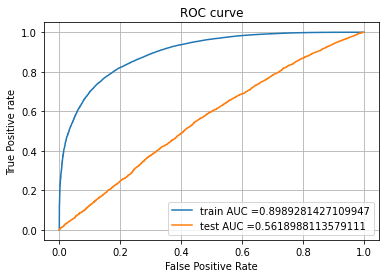

In [41]:
# Reference: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
xgb_tfidf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

xgb_tfidf.fit(X_train_tfidf,Y_train)
# By default, the predictions made by XGBoost are probabilities
y_train_pred_tfidf = xgb_tfidf.predict_proba(X_train_tfidf)[:,1] 
y_test_pred_tfidf = xgb_tfidf.predict_proba(X_test_tfidf)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred_tfidf)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred_tfidf)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()


### Confusion Matrix

In [42]:
print("Training Confusion Matrix")
y_train_pred_ = [round(value) for value in y_train_pred_tfidf]
print(confusion_matrix(Y_train, y_train_pred_))

print("#"*50)
print("#"*50)
print("\nTest Confusion Matrix")
y_test_pred_ = [round(value) for value in y_test_pred_tfidf]
print(confusion_matrix(Y_test, y_test_pred_))

Training Confusion Matrix
[[  975 11431]
 [    6 69524]]
##################################################
##################################################

Test Confusion Matrix
[[   21  4115]
 [   46 23130]]


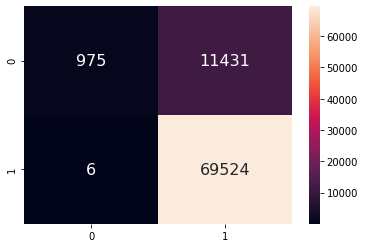

In [43]:
confusion_m = pd.DataFrame(confusion_matrix(Y_train, y_train_pred_))
sns.heatmap(confusion_m, annot=True,annot_kws={"size": 16}, fmt='g')

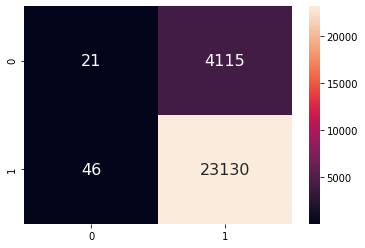

In [44]:
confusion_m = pd.DataFrame(confusion_matrix(Y_test, y_test_pred_))
sns.heatmap(confusion_m, annot=True,annot_kws={"size": 16}, fmt='g')

# TFIDF-W2VEC Model

### RandomSearchCV for finding best hyperparameter

In [27]:
xgb = XGBClassifier()
rsclf = RandomizedSearchCV(xgb,param_distributions=params,cv =3,scoring='roc_auc',return_train_score=True)
rsclf.fit(X_train_w2vec,Y_train)
print(rsclf.best_score_)
print(rsclf.best_estimator_)
print(rsclf.best_params_)
tfidfw2v_res = pd.DataFrame.from_dict(rsclf.cv_results_)

0.6940107771973844
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=50,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
{'n_estimator': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.5}


### Plotting 3d-Scatter plot

In [28]:
#reference: https://plotly.com/python/3d-scatter-plots/
x = tfidfw2v_res['param_n_estimator']
y =  tfidfw2v_res['param_max_depth']
z_test = tfidfw2v_res['mean_test_score']
z_train = tfidfw2v_res['mean_train_score']
trace1 = go.Scatter3d(x=x,y=y,z=z_train, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z_test, name = 'Cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))
fig = go.Figure(data=data,layout=layout)
fig.show()

In [29]:
rsclf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=50,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

### Training model on best hyperparameters and plotting roc curve

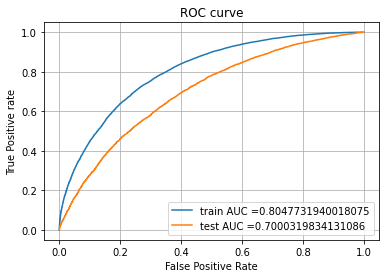

In [36]:
# Reference: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
xgb_tfidfw2v = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=50,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
xgb_tfidfw2v.fit(X_train_w2vec,Y_train)
# By default, the predictions made by XGBoost are probabilities
y_train_pred_tfidfw2v = xgb_tfidfw2v.predict_proba(X_train_w2vec)[:,1] 
y_test_pred_tfidfw2v = xgb_tfidfw2v.predict_proba(X_test_w2vec)[:,1] 
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, y_train_pred_tfidfw2v)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, y_test_pred_tfidfw2v)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()




### Confusion Matrix

In [37]:
print("Training Confusion Matrix")
y_train_pred_ = [round(value) for value in y_train_pred_tfidfw2v]
print(confusion_matrix(Y_train, y_train_pred_))

print("#"*50)
print("#"*50)
print("\nTest Confusion Matrix")
y_test_pred_ = [round(value) for value in y_test_pred_tfidfw2v]
print(confusion_matrix(Y_test, y_test_pred_))

Training Confusion Matrix
[[  405 12001]
 [   37 69493]]
##################################################
##################################################

Test Confusion Matrix
[[   48  4088]
 [   40 23136]]


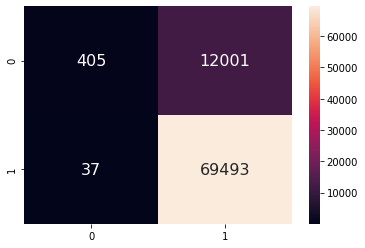

In [38]:
confusion_m = pd.DataFrame(confusion_matrix(Y_train, y_train_pred_))
sns.heatmap(confusion_m, annot=True,annot_kws={"size": 16}, fmt='g')

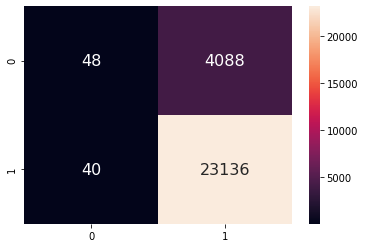

In [39]:
confusion_m = pd.DataFrame(confusion_matrix(Y_test, y_test_pred_))
sns.heatmap(confusion_m, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [45]:
vectorizer =['TFIDF','TFIDF_W2VEC']
Model = ['GBDT','GBDT']
gamma =[0.1,0.01]
n_estimator = [100,50]
learning_rate = [0.1,0.1]
max_depth =[9,5]

Test_AUC = [0.5618988113579111,0.7000319834131086]
Train_AUC = [0.8989281427109947,0.8047731940018075]

summary = pd.DataFrame({'vectorizer':vectorizer,'Model':Model,'gamma':gamma,'max_depth':max_depth,\
                        'learning_rate':learning_rate,'n_estimator':n_estimator,'Test_AUC':Test_AUC,
                       'Train_AUC':Train_AUC })
summary

,vectorizer,Model,gamma,max_depth,learning_rate,n_estimator,Test_AUC,Train_AUC
0,TFIDF,GBDT,0.10,9,0.1,100,0.561899,0.898928
1,TFIDF_W2VEC,GBDT,0.01,5,0.1,50,0.700032,0.804773
